# Introduction to Pandas


**Pandas** is a widely-used Python library in data science and analysis. It provides two key data structures - **Series** and **DataFrame** - designed to handle a majority of statistical and machine learning data requirements. Whether you need to manipulate data, perform statistical analysis, or create visualizations, Pandas has become an essential tool for all data-related tasks in Python.

Pandas excels in:
- Data cleaning
- Data transformation
- Data analysis
- Data visualization
    

## Core Components: Series and DataFrame

In [2]:

import pandas as pd

# Creating a Series
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])

# Creating a DataFrame
data = {'Column1': [1, 2, 3], 'Column2': [4, 5, 6]}
df = pd.DataFrame(data)
print(f'Series:\n{s}')
print(f'Dataframe:\n{df}')
    

Series:
a    1
b    2
c    3
dtype: int64
Dataframe:
   Column1  Column2
0        1        4
1        2        5
2        3        6



A **Series** is akin to a column in a spreadsheet, a one-dimensional array, or a list of values. A **DataFrame**, on the other hand, is a multi-dimensional table made up of a collection of Series.

These data structures incorporate a range of underlying functionalities that provide a powerful, high-level interface for manipulating, cleaning, and analyzing data.
    

## Importing and Exploring Data

In [3]:

# Example code for importing and exploring data
data = pd.read_csv('../data/sample_data.csv')
    

In [4]:
# Showing the head of the dataframe
data.head()

,Name,Age,Salary,Department
0,John,28,70000.0,HR
1,Anna,22,NaN,Finance
2,Peter,35,120000.0,Engineering
3,Linda,50,110000.0,Management
4,James,18,55000.0,Intern


In [5]:
# Describe the dataframe
data.describe()

,Age,Salary
count,5.000000,4.00000
mean,30.600000,88750.00000
std,12.601587,31191.61212
min,18.000000,55000.00000
25%,22.000000,66250.00000
50%,28.000000,90000.00000
75%,35.000000,112500.00000
max,50.000000,120000.00000


In [21]:
# Info about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        5 non-null      object 
 1   Age         5 non-null      int64  
 2   Salary      4 non-null      float64
 3   Department  5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes



Data importing is simplified with Pandas, providing functionality to read data from various formats like CSV, Excel, SQL databases, and more. Initial data exploration is crucial to understand the data structure, and Pandas provides methods like `head()`, `describe()`, and `info()` for a quick overview of the data.
    

## Data Cleaning and Preprocessing

In [6]:

# Handling missing values in 'Salary'
data['Salary'].fillna(data['Salary'].mean(), inplace=True)  # Filling NaN with mean of 'Salary'

# Ensure 'Age' and 'Salary' are of numeric types if performing mathematical operations
data[['Age', 'Salary']] = data[['Age', 'Salary']].apply(pd.to_numeric, errors='coerce', axis=1)

# Now, your operations should work without issues
data_clean = data.dropna()
filtered_data = data_clean[data_clean['Age'] > 25]
grouped_data = data_clean.groupby('Department')['Salary'].mean()
    

In [7]:
data_clean

,Name,Age,Salary,Department
0,John,28.0,70000.0,HR
1,Anna,22.0,88750.0,Finance
2,Peter,35.0,120000.0,Engineering
3,Linda,50.0,110000.0,Management
4,James,18.0,55000.0,Intern


In [8]:
filtered_data

,Name,Age,Salary,Department
0,John,28.0,70000.0,HR
2,Peter,35.0,120000.0,Engineering
3,Linda,50.0,110000.0,Management


In [9]:
grouped_data

Department
Engineering    120000.0
Finance         88750.0
HR              70000.0
Intern          55000.0
Management     110000.0
Name: Salary, dtype: float64


The real-world data is often messy. Pandas provides a variety of methods to help clean and preprocess data, making it ready for analysis. From handling missing data, filtering rows/columns, to grouping and reshaping data, Pandas provides a versatile toolkit for data cleaning and preprocessing.
    

## Data Analysis and Visualization with Pandas

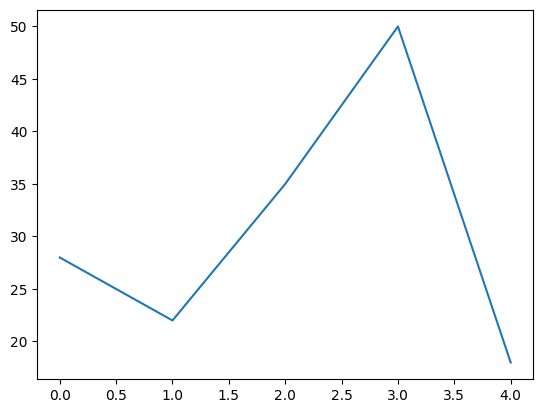

In [31]:

# Example code for basic statistical analysis and visualization
data.describe()
data.sum()
data['Age'].mean()

# Visualization using Matplotlib
import matplotlib.pyplot as plt
data['Age'].plot()
plt.show()
    


Pandas seamlessly integrates with **Matplotlib**, providing a high-level interface for creating a variety of static, animated, and interactive visualizations in Python. The library allows for detailed statistical analysis alongside straightforward visualization capabilities, making it possible to conduct thorough data analysis right out of the box.
    

### Iterating Over a DataFrame

Iterating over a DataFrame in Pandas can be achieved using several methods, each with its own use case and performance implications. Below are some common methods for iterating over rows in a DataFrame:

#### 1. `iterrows()`

The `iterrows()` method returns an iterator yielding pairs of (index, Series) for each row in the DataFrame. It's commonly used due to its simplicity and readability.


In [32]:
import pandas as pd

# Example DataFrame
data = {
    'Name': ['John', 'Anna', 'Peter'],
    'Age': [28, 22, 35],
}
df = pd.DataFrame(data)

# Iterating using iterrows()
for index, row in df.iterrows():
    print(f"Index: {index}, Name: {row['Name']}, Age: {row['Age']}")


Index: 0, Name: John, Age: 28
Index: 1, Name: Anna, Age: 22
Index: 2, Name: Peter, Age: 35




**Note:** While `iterrows()` is intuitive, it's not always the best choice in terms of performance, especially with large DataFrames, since it returns a Series object for each row which can be memory-intensive.

#### 2. `itertuples()`

`itertuples()` returns an iterator yielding namedtuples of the rows. It's generally faster than `iterrows()` and is memory-efficient since it does not convert the rows to Series objects.


In [33]:
# Iterating using itertuples()
for row in df.itertuples():
    print(f"Index: {row.Index}, Name: {row.Name}, Age: {row.Age}")


Index: 0, Name: John, Age: 28
Index: 1, Name: Anna, Age: 22
Index: 2, Name: Peter, Age: 35




#### 3. `apply()`

While not exactly a method for iteration, `apply()` can be used to apply a function along the axis of the DataFrame, which can sometimes be used to achieve the same result as iterating through each row, but in a more Pandas-idiomatic way.



In [36]:
# Using apply() to operate on each row
def process_row(row):
    print(f"Name: {row['Name']}, Age: {row['Age']}")
    
_ = df.apply(process_row, axis=1) # The _ = is to prevent it from printing None values

Name: John, Age: 28
Name: Anna, Age: 22
Name: Peter, Age: 35


### Considerations

- **Performance:** Be mindful of the performance implications when choosing an iteration method, especially with large datasets.
- **Vectorization:** Often, operations can be vectorized (applying an operation to the whole column at once), which is more efficient than iteration in Pandas. Always explore if an operation can be performed without iterating through the DataFrame.
- **Modification Warning:** Be cautious while trying to modify DataFrames during iteration, as it might not always have the desired effect and is generally discouraged.

In practice, always consider vectorized operations or using `apply()` before opting for iteration to leverage the powerful and efficient functionality provided by Pandas.

### Understanding the `axis` Parameter in Pandas

In Pandas, the `axis` parameter is frequently used in various methods (`apply()`, `drop()`, `mean()`, etc.) to specify the direction of an operation. Essentially, it indicates whether the operation should be applied vertically or horizontally, across rows or columns. 

- `axis=0` or `axis='index'`: Apply an operation along the index, i.e., **vertically** across **rows**.
- `axis=1` or `axis='columns'`: Apply an operation along the columns, i.e., **horizontally** across **columns**.

#### Understanding `axis` through Examples

##### Example 1: Using `apply()`
When using `apply()`, `axis=1` applies the function to each row, whereas `axis=0` applies the function to each column.


In [37]:
import pandas as pd

# Example DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Applying a function across each column (axis=0)
column_sum = df.apply(sum, axis=0)
print(f"Sum across each column:\n{column_sum}\n")

# Applying a function across each row (axis=1)
row_sum = df.apply(sum, axis=1)
print(f"Sum across each row:\n{row_sum}\n")


Sum across each column:
A     6
B    15
dtype: int64

Sum across each row:
0    5
1    7
2    9
dtype: int64



##### Example 2: Using `drop()`
When using `drop()`, `axis=1` drops a column, and `axis=0` drops a row.


In [41]:
print('Original')
print(df)

# Dropping a column (axis=1)
df_dropped_column = df.drop('A', axis=1)

# Dropping a row (axis=0)
df_dropped_row = df.drop(1, axis=0)

print('Dropped Column')
print(df_dropped_column)

print('Dropped Row')
print(df_dropped_row)

Original
   A  B
0  1  4
1  2  5
2  3  6
Dropped Column
   B
0  4
1  5
2  6
Dropped Row
   A  B
0  1  4
2  3  6


##### Example 3: Using `mean()`
When using statistical methods like `mean()`, `axis=1` computes the mean across columns, and `axis=0` computes it down the rows.


In [43]:
# Mean of each column (axis=0)
column_mean = df.mean(axis=0)

# Mean of each row (axis=1)
row_mean = df.mean(axis=1)
print(column_mean)
print(row_mean)


A    2.0
B    5.0
dtype: float64
0    2.5
1    3.5
2    4.5
dtype: float64


### Tips:
- **Row-wise Operation:** Think "I want to apply this function along the row," then use `axis=1`.
- **Column-wise Operation:** Think "I want to apply this function down the column," then use `axis=0`.

Understanding the `axis` parameter is crucial for utilizing Pandas effectively as it's widely used across numerous methods. Always refer back to the axis logic: `axis=0` operates down the rows (think column-wise operation), and `axis=1` operates across the columns (think row-wise operation).

### Leveraging `loc` and `iloc` in Pandas

Pandas provides two robust indexing methods: `loc` and `iloc`, which are used to access a group of rows and columns by labels or boolean arrays (`loc`) and by integer indexes (`iloc`). These methods enable more advanced and specific data selection and assignment, enhancing the efficiency of data manipulation.

#### 1. `loc`: Label-based Data Selection
`loc` is primarily label-based indexing. It's used to access a group of rows and columns by labels or a boolean array. It allows you to select data using row and column labels and conditions.

- **Selecting Single Row by Label:** `df.loc[row_label]`
- **Selecting Rows and Specific Columns by Label:** `df.loc[row_label, column_label]`
- **Conditional Selection:** `df.loc[df['Column'] condition]`

##### Example Usage of `loc`:


In [45]:
import pandas as pd

data = {'Age': [28, 22, 35, 50], 'Salary': [70000, 72000, 120000, 110000]}
df = pd.DataFrame(data, index=['John', 'Anna', 'Peter', 'Linda'])

# Selecting a single row by label
johns_data = df.loc['John']

print(johns_data, '\n')

# Selecting multiple rows and specific columns by label
subset_data = df.loc[['Anna', 'Linda'], 'Age']
print(subset_data, '\n')

# Conditional selection
high_salary = df.loc[df['Salary'] > 100000]
print(high_salary, '\n')


Age          28
Salary    70000
Name: John, dtype: int64 

Anna     22
Linda    50
Name: Age, dtype: int64 

       Age  Salary
Peter   35  120000
Linda   50  110000 



#### 2. `iloc`: Integer-location based Indexing
`iloc` is primarily integer-location based indexing. It's used to select elements by their index location (integer values). `iloc` allows you to select data using row and column index positions.

- **Selecting Single Row by Index:** `df.iloc[row_index]`
- **Selecting Specific Rows and Columns by Index:** `df.iloc[row_index, column_index]`
- **Slicing:** `df.iloc[row_start_index:row_end_index, column_start_index:column_end_index]`

##### Example Usage of `iloc`:


In [46]:
# Selecting a single row by index
first_row = df.iloc[0]

print(first_row, '\n')

# Selecting specific rows and columns by index
subset_data = df.iloc[1:3, 0]

print(subset_data, '\n')

# Selecting specific rows and all columns
specific_rows = df.iloc[1:3, :]
print(specific_rows, '\n')

Age          28
Salary    70000
Name: John, dtype: int64 

Anna     22
Peter    35
Name: Age, dtype: int64 

       Age  Salary
Anna    22   72000
Peter   35  120000 



### Points to Remember:
- **Boolean Indexing:** Both `loc` and `iloc` support boolean indexing to filter rows.
- **Setting Values:** `loc` and `iloc` can also be used to modify values within the DataFrame.
- **Avoid Chained Indexing:** Utilize `loc` or `iloc` to avoid chained indexing (e.g., `df[row][column]`) which may lead to unexpected results.

Understanding and effectively using `loc` and `iloc` is pivotal in achieving more precise and efficient data selection, enhancing your data analysis and manipulation capabilities in Pandas.